In [4]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv('HIGH_TEST_MOTEUR.csv')
sim = pd.read_csv('data_config-30k-29-octobre-2023.csv')


print(data.columns,sim.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'time', 'T', 'P_bonbonne', 'P_inj',
       'P_comb', 'M_bonbonne', 'T_m_avg'],
      dtype='object') Index(['Time      (s)', 'ISP     (m/s)', 'C*      (m/s)', 'Pe/Pb     (-)',
       'Thrust    (N)', 'Impulse  (Ns)', 'P tank (psia)', 'P inj. (psia)',
       'P comb (psia)', 'P crit (psia)', 'O/F       (-)', 'm. ox. (kg/s)',
       'Gox (kg/s-m2)', 'r.     (mm/s)'],
      dtype='object')


In [6]:
T = data['T']
p_comb = data['P_comb']
time = data['time']

sim_T = sim['Thrust    (N)']
sim_time = sim['Time      (s)']

In [7]:
def fft(value ,t = time, name = '', ylim = None,minxlim = 25):
    y = value - value.mean()
    fft_values = np.fft.fft(y)
    frequencies = np.fft.fftfreq(len(y), d=np.mean(np.diff(t)))

    amplitudes = np.abs(fft_values)
    positive_freq_idxs = np.where(frequencies > 0)
    frequencies = frequencies[positive_freq_idxs]
    amplitudes = amplitudes[positive_freq_idxs]

    
    plt.figure()
    plt.plot(frequencies, amplitudes,linewidth = 1)
    plt.title('Spectrum des fréquences '+ name)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    if ylim != None:
        plt.ylim(0, ylim)
    if minxlim != None:
        plt.xlim(left = minxlim)
    plt.show()
    #amp = amplitudes[frequencies>25]
    #print(f"max resonnance : {frequencies[amp == max(amp)]}")

    return frequencies,amplitudes



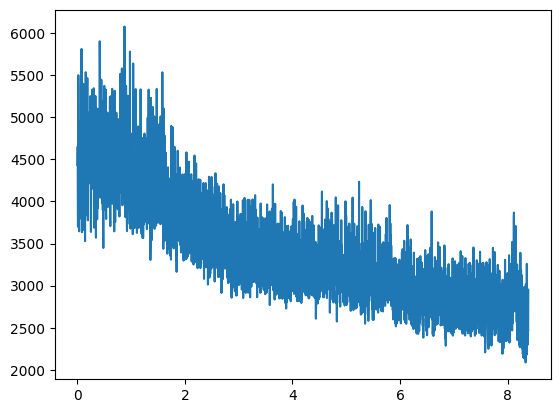

In [8]:
plt.plot(time,T)

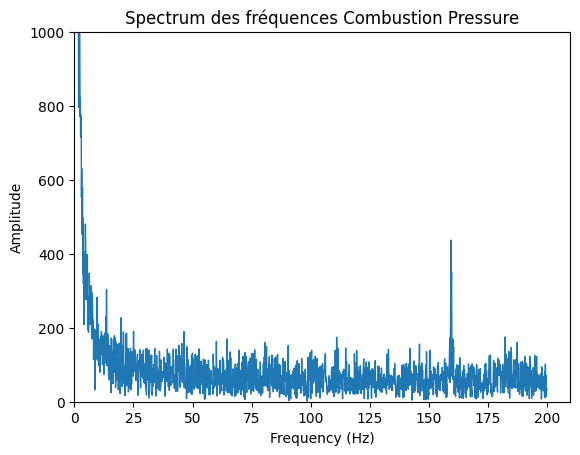

(array([1.19225037e-01, 2.38450075e-01, 3.57675112e-01, ...,
        1.99701937e+02, 1.99821162e+02, 1.99940387e+02]),
 array([3.87543037e+04, 2.31725467e+04, 1.14719352e+04, ...,
        1.42283041e+01, 3.65140430e+01, 3.26324687e+01]))

In [9]:
fft(p_comb, name = 'Combustion Pressure',ylim = 1000,minxlim = 0)

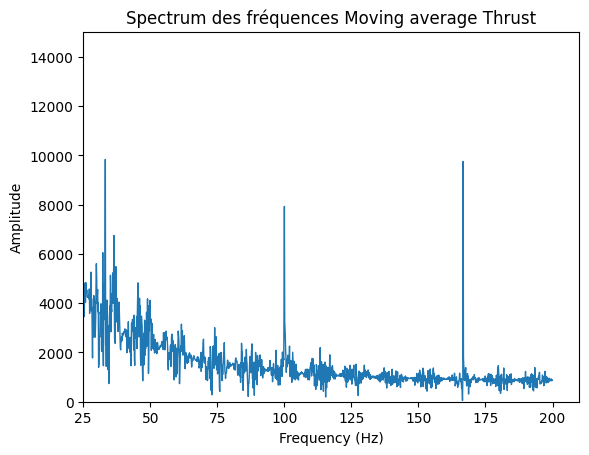

(array([1.19225037e-01, 2.38450075e-01, 3.57675112e-01, ...,
        1.99701937e+02, 1.99821162e+02, 1.99940387e+02]),
 array([9.99446697e+05, 7.24500241e+05, 3.27811501e+05, ...,
        8.48398486e+02, 8.84459168e+02, 8.76378289e+02]))

In [10]:
fft(data['T_m_avg'],name = 'Moving average Thrust',ylim=15000)

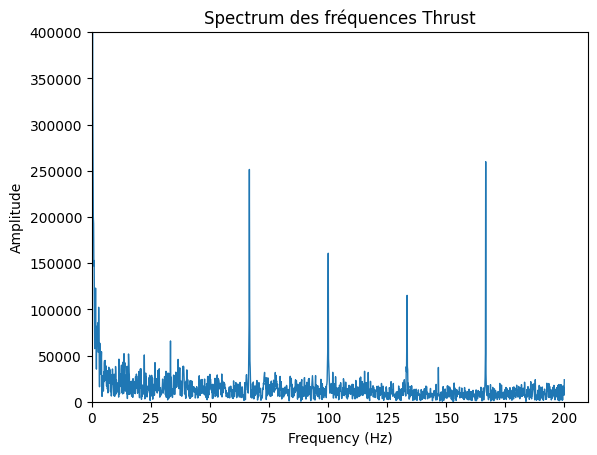

(array([1.19225037e-01, 2.38450075e-01, 3.57675112e-01, ...,
        1.99701937e+02, 1.99821162e+02, 1.99940387e+02]),
 array([989735.82279392, 720988.6859402 , 328109.00638073, ...,
         15559.24677933,   7081.48994721,  23789.12217831]))

In [11]:
fft(T,name = 'Thrust',minxlim=0,ylim = 0.4e6)

Text(0.5, 1.0, 'Comparaison Thrust/Sim')

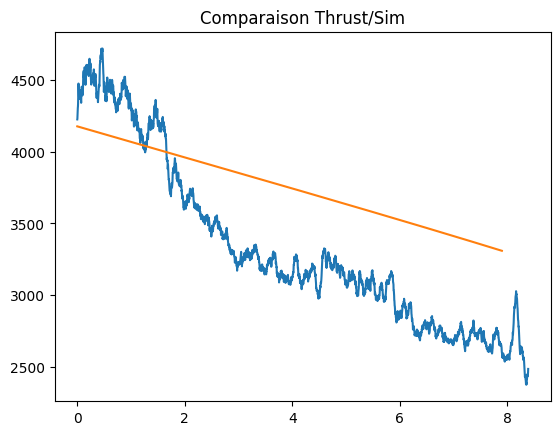

In [16]:
plt.plot(time,data['T_m_avg'])
plt.plot(sim_time,sim_T)
plt.title('Comparaison Thrust/Sim')